In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("D:/M.Tech/My Projects/DATASETS/Salary_dataset.csv")

In [13]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [17]:
data[['YearsExperience', 'Salary']]

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [20]:
data = data.drop(columns=["Unnamed: 0"], errors="ignore")

In [22]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [25]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Text(0.5, 1.0, 'SALARY vs YEARS OF EXPERIENCE')

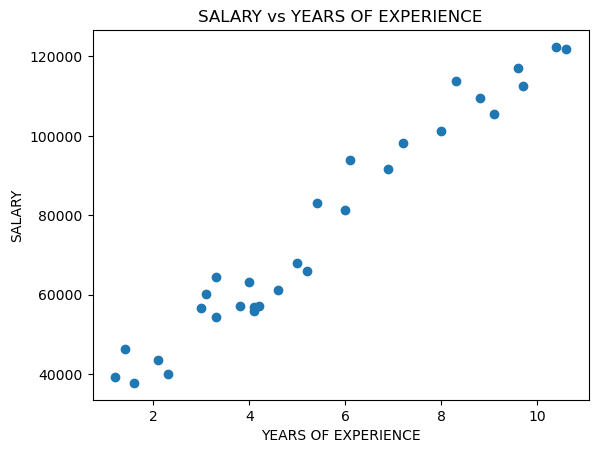

In [28]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")
plt.title("SALARY vs YEARS OF EXPERIENCE")

IMPORTANT NOTE:

    x should be in 2D
    
    y should be in 1D

In [46]:
x = data[['YearsExperience']]
y = data['Salary']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
x_train

,YearsExperience
28,10.4
24,8.8
12,4.1
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2
11,4.1
22,8.0


In [51]:
reg_model=lr()

TRAINING THE MODEL

In [52]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [89]:
sal_prediction = reg_model.predict(x_test)
sal_prediction
results = pd.DataFrame({
    'YearsExperience': x_test.values.ravel(),   # flatten to 1D
    'ActualSalary': y_test.values,
    'PredictedSalary': sal_prediction
})
results = results.sort_values(by="YearsExperience").reset_index(drop=True)

In [90]:
results

,YearsExperience,ActualSalary,PredictedSalary
0,3.3,64446.0,55478.792045
1,3.8,57190.0,60190.699707
2,5.0,67939.0,71499.278095
3,5.4,83089.0,75268.804224
4,8.3,113813.0,102597.868661
5,9.7,112636.0,115791.210113


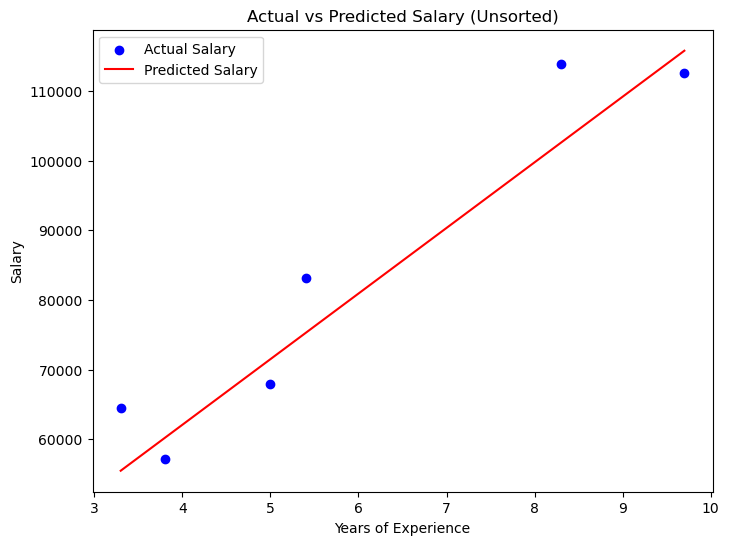

In [91]:
plt.figure(figsize=(8,6))

# Scatter for actual values
plt.scatter(results['YearsExperience'], results['ActualSalary'], color='blue', label='Actual Salary')

# Line for predicted values (connects in test order, not sorted)
plt.plot(results['YearsExperience'], results['PredictedSalary'], color='red', label='Predicted Salary')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary (Unsorted)")
plt.legend()
plt.show()